In [73]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
from time import time
import re
import datetime as dt

%matplotlib inline

%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

%load_ext autoreload
%autoreload 2

# Constants definition
DATA_PATH = '../data/preprocessed_data/'
PROJECT_ROOT = '../'
SRC = PROJECT_ROOT + 'src/'

DATA = 'data.csv'

sys.path.append(SRC)

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
data_df = pd.read_csv(DATA_PATH + DATA, index_col=0)

In [75]:
data_df.head()

,exchange_rate,symbol,date,cpi,name,country,region,cpi_usa,rate_std
0,0.27224,AED,2007-01-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,92.83,1.000000
1,0.27230,AED,2007-02-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,93.32,1.000220
2,0.27242,AED,2007-03-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,94.17,1.000661
3,0.27233,AED,2007-04-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,94.79,1.000331
4,0.27241,AED,2007-05-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,95.37,1.000624


In [84]:
data_df['rate_std'] = data_df.groupby('symbol').apply(lambda x: x['exchange_rate'] / x[x['date']=='2010-08-15']['exchange_rate'].values).reset_index(0, drop=True)

In [87]:
data_df.groupby('symbol').apply(lambda x: print(x[x['date']=='2010-08-15']['exchange_rate'].values))

[ 0.27238]
[ 0.27238]
[ 0.65869]
[ 0.56821]
[ 0.96026]
[ 0.9625]
[ 0.14732]
[ 0.00055022]
[ 2.2017]
[ 0.051962]
[ 0.17299]
[ 0.0133978]
[ 0.175886]
[ 1.28861]
[ 0.51784]
[ 1.5646]
[ 0.69746]
[ 0.12869]
[ 0.052924]
[ 0.17773]
[ 0.0045812]
[ 0.00011153]
[ 0.2636]
[ 0.021487]
[ 0.0083736]
[ 0.0116811]
[ 0.0117187]
[ 0.00084693]
[ 3.481]
[ 0.0088937]
[ 0.116022]
[ 3.0017]
[ 0.07827]
[ 0.31716]
[ 0.16235]
[ 0.35703]
[ 0.022133]
[ 0.0116702]
[ 0.32342]
[ 0.3039]
[ 0.03289]
[ 0.26676]
[ 0.136735]
[ 0.7377]
[ 0.042774]
[ 0.031528]
[ 0.68036]
[ 0.66166]
[ 0.15799]
[ 0.048108]
[  5.19420000e-05]
[ 0.137129]


""


In [88]:
data_df.head()

,exchange_rate,symbol,date,cpi,name,country,region,cpi_usa,rate_std
0,0.27224,AED,2007-01-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,92.83,0.999486
1,0.27230,AED,2007-02-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,93.32,0.999706
2,0.27242,AED,2007-03-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,94.17,1.000147
3,0.27233,AED,2007-04-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,94.79,0.999816
4,0.27241,AED,2007-05-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,95.37,1.000110


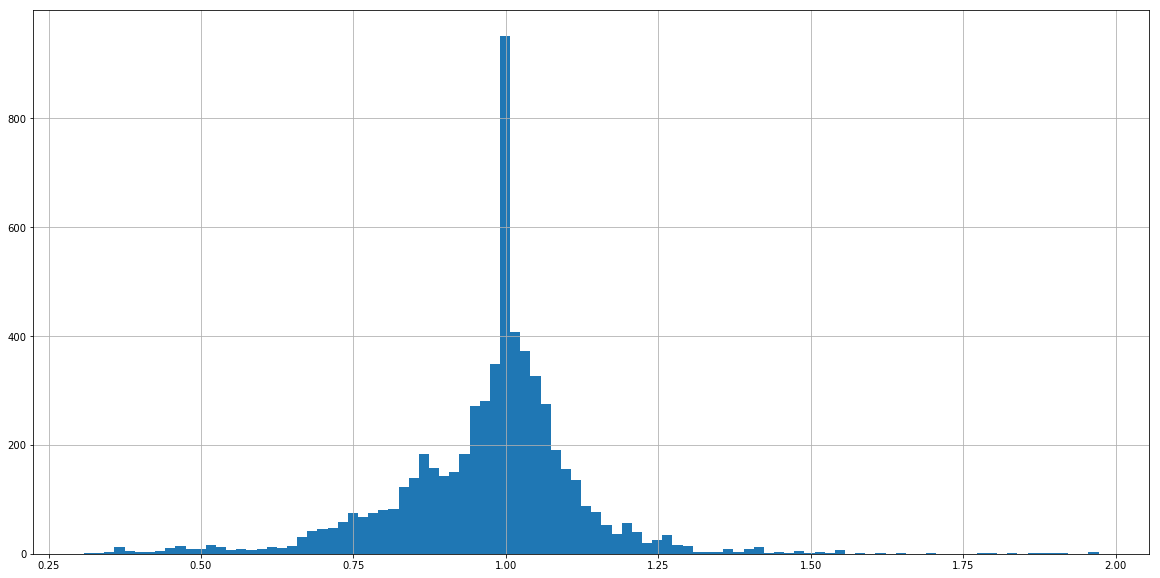

In [89]:
data_df['rate_std'].hist(bins=100)

In [90]:
data_df.to_csv(DATA_PATH + DATA)

In [91]:
data_df.head()

,exchange_rate,symbol,date,cpi,name,country,region,cpi_usa,rate_std
0,0.27224,AED,2007-01-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,92.83,0.999486
1,0.27230,AED,2007-02-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,93.32,0.999706
2,0.27242,AED,2007-03-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,94.17,1.000147
3,0.27233,AED,2007-04-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,94.79,0.999816
4,0.27241,AED,2007-05-15,86.95,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,95.37,1.000110


In [92]:
data_2010_df = data_df[data_df['date'] >= '2010-01-15'][data_df['date'] <= '2010-12-15']

/home/miguel/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [93]:
data_2010_df.head()

,exchange_rate,symbol,date,cpi,name,country,region,cpi_usa,rate_std
36,0.27244,AED,2010-01-15,99.31,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,99.37,1.000220
37,0.27208,AED,2010-02-15,99.15,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,99.40,0.998899
38,0.27237,AED,2010-03-15,99.24,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,99.81,0.999963
39,0.27230,AED,2010-04-15,99.21,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,99.98,0.999706
40,0.27237,AED,2010-05-15,99.14,United Arab Emirates dirham,United Arab Emirates,Middle East & North Africa,100.06,0.999963


In [94]:
data_df.groupby('symbol')['cpi'].mean()

symbol
AED    101.431167
BGN    101.603667
BRL    112.606583
CAD    103.110417
CHF     99.082417
CNY    105.631750
COP    105.426667
CYP    100.822417
CZK    102.490417
DKK    102.275167
DZD    109.098000
EGP    117.265667
EUR    102.805417
FJD    106.105083
GBP    104.132500
GHS    123.369750
HKD    108.553417
HNL    109.197333
HRK    102.435750
HUF    103.320167
IDR    109.431000
ILS    101.732000
INR    114.734500
ISK    103.544667
JMD    110.607667
JPY    101.285250
KRW    102.980583
KWD    104.590167
LKR    109.261417
MAD    101.775250
MTL    102.606833
MXN    105.518667
MYR    104.246250
NOK    102.026333
PEN    105.879583
PHP    105.072167
PKR    113.392500
PLN    102.732417
RON    103.659917
RUB    113.975167
SAR    105.119167
SEK    101.676750
SGD    105.215583
SKK    103.648167
THB    103.943500
TND    108.307667
TRY    114.348583
TTD    109.026917
UYU    116.702083
VND    117.159583
ZAR    109.193250
Name: cpi, dtype: float64

In [96]:
uy_df = data_df[data_df['symbol'] == 'UYU']
uy_df.head()

,exchange_rate,symbol,date,cpi,name,country,region,cpi_usa,rate_std
5760,0.041107,UYU,2007-01-15,77.95,Peso Uruguayo,Uruguay,Latin America & Caribbean,92.83,0.854473
5761,0.041219,UYU,2007-02-15,78.43,Peso Uruguayo,Uruguay,Latin America & Caribbean,93.32,0.856801
5762,0.041350,UYU,2007-03-15,79.13,Peso Uruguayo,Uruguay,Latin America & Caribbean,94.17,0.859524
5763,0.041681,UYU,2007-04-15,80.10,Peso Uruguayo,Uruguay,Latin America & Caribbean,94.79,0.866405
5764,0.041819,UYU,2007-05-15,80.71,Peso Uruguayo,Uruguay,Latin America & Caribbean,95.37,0.869273


In [100]:
q = uy_df['rate_std'] - uy_df['cpi_usa']/uy_df['cpi']

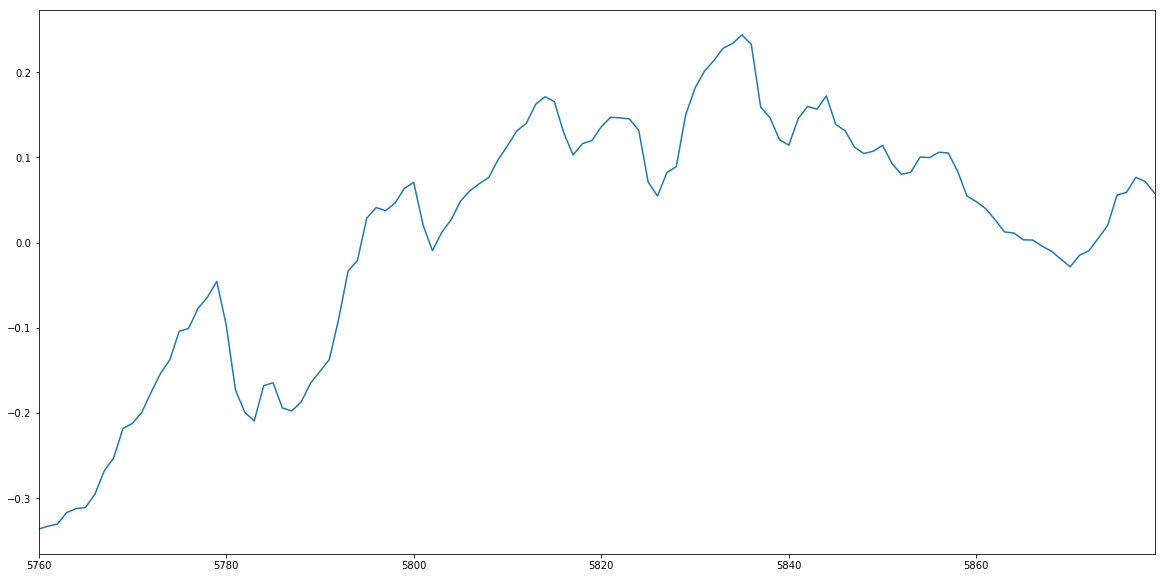

In [101]:
q.plot()

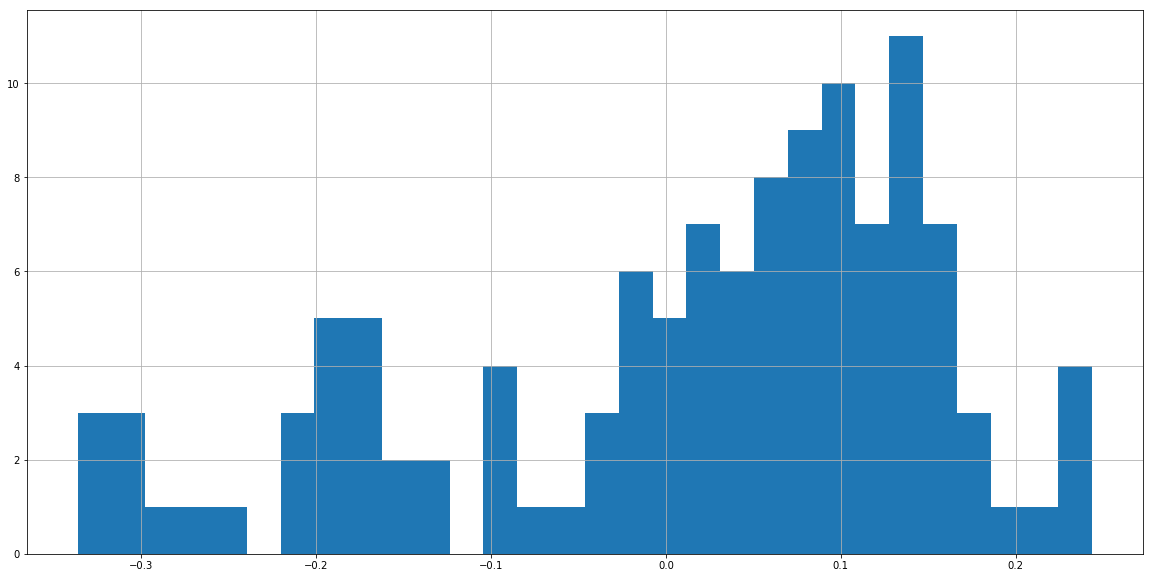

In [107]:
q.hist(bins=30)

In [108]:
q_tot = data_df['rate_std'] - data_df['cpi_usa']/data_df['cpi']

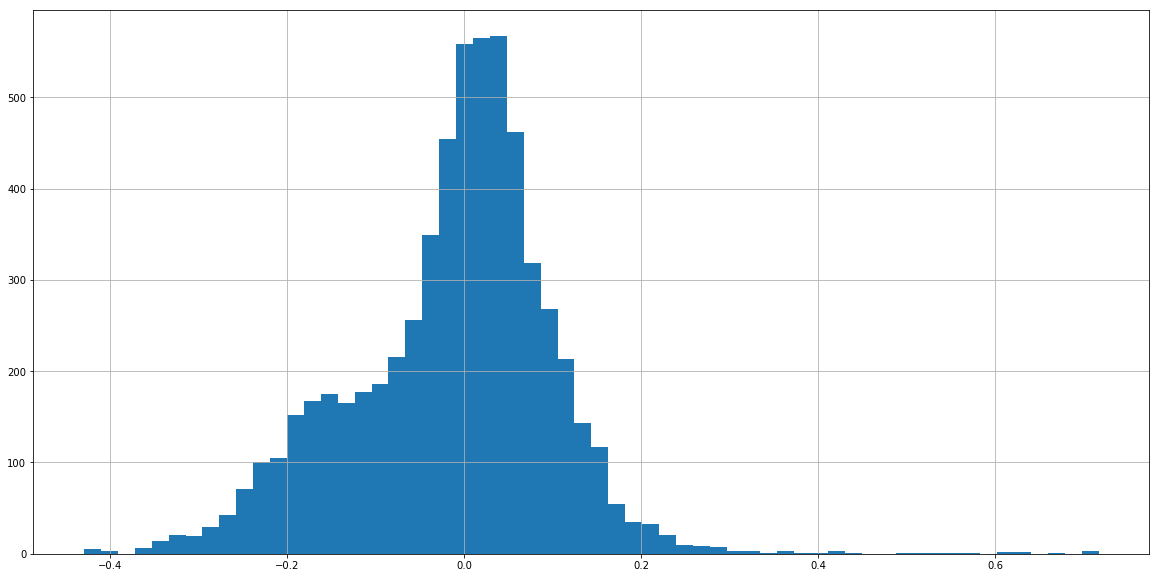

In [113]:
q_tot.hist(bins=60)

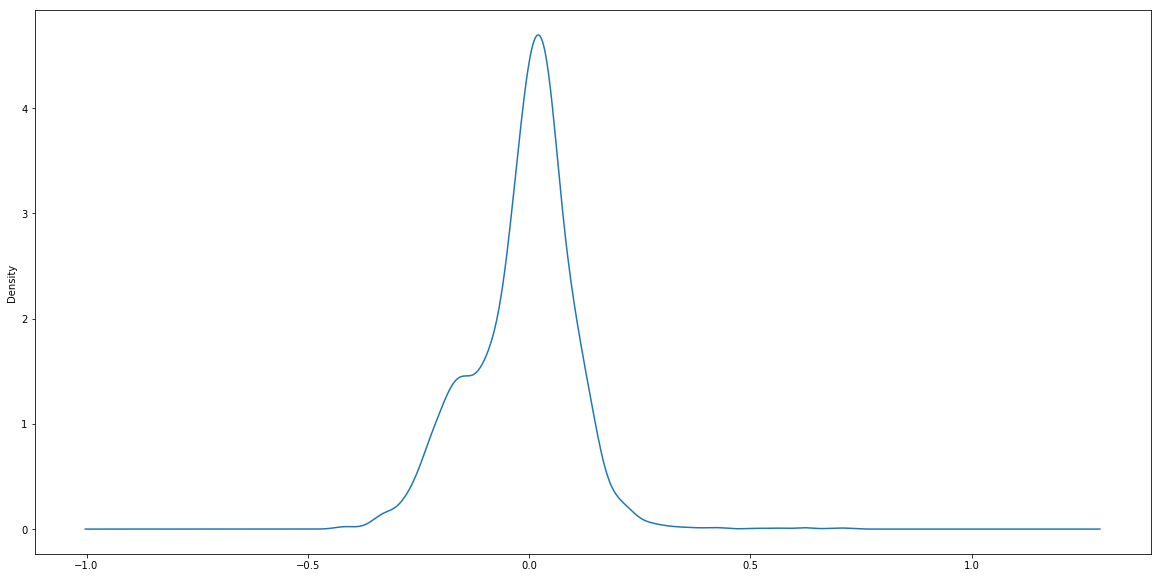

In [114]:
q_tot.plot(kind='density')